In [1]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets,transforms
import os

print(torch.__version__)


2.6.0


In [2]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
print(f"Using device = ", device)

Using device =  mps


In [3]:
#define dataset paths
train_dir = "CustomDataSet/data/train"
test_dir = "CustomDataSet/data/test"

In [4]:
# Define train and test
train_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
    transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2 , saturation=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))
])

test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))
])

In [5]:
# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

In [6]:
# Create dataloaders
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle= False)

In [7]:
from model import CustomCNN

In [8]:
model_0 = CustomCNN(num_classes=4)
model_0.to(device)

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
)

In [9]:
class_name = train_data.classes
class_name

['donuts', 'french_fries', 'fried_rice', 'samosa']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'donuts': 0, 'french_fries': 1, 'fried_rice': 2, 'samosa': 3}

In [11]:
len(train_data), len(test_data)

(1834, 608)

In [12]:
from torchinfo import summary

summary(model=model_0,
        input_size=(32,3,128,128),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        
        )

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CustomCNN (CustomCNN)                    [32, 3, 128, 128]    [32, 4]              --                   True
├─Conv2d (conv1)                         [32, 3, 128, 128]    [32, 32, 128, 128]   896                  True
├─ReLU (relu)                            [32, 32, 128, 128]   [32, 32, 128, 128]   --                   --
├─MaxPool2d (pool)                       [32, 32, 128, 128]   [32, 32, 64, 64]     --                   --
├─Conv2d (conv2)                         [32, 32, 64, 64]     [32, 64, 64, 64]     18,496               True
├─ReLU (relu)                            [32, 64, 64, 64]     [32, 64, 64, 64]     --                   --
├─MaxPool2d (pool)                       [32, 64, 64, 64]     [32, 64, 32, 32]     --                   --
├─Conv2d (conv3)                         [32, 64, 32, 32]     [32, 128, 32, 32]    73,856               True
├─ReLU (relu)         

In [13]:
# setup loss functon and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001, weight_decay=1e-4)

In [14]:
from trainNN import train
torch.manual_seed(42)

from timeit import default_timer as timer
start_time= timer()

results = train(
    model= model_0,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=criterion,
    epochs=20,
    device=device
)
end_time = timer()
print(f"[INFO] total training time: {end_time - start_time:.3f} seconds")

/Users/sangyogpuri/.pyenv/versions/3.11.6/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  5%|▌         | 1/20 [00:26<08:32, 26.98s/it]

Epoch: 1 | train_loss: 1.3519 | train_acc: 0.3324 | test_loss: 1.2922 | test_acc: 0.3914


 10%|█         | 2/20 [00:50<07:30, 25.01s/it]

Epoch: 2 | train_loss: 1.2844 | train_acc: 0.3874 | test_loss: 1.1915 | test_acc: 0.4770


 15%|█▌        | 3/20 [01:14<06:56, 24.51s/it]

Epoch: 3 | train_loss: 1.2296 | train_acc: 0.4430 | test_loss: 1.1555 | test_acc: 0.4984


 20%|██        | 4/20 [01:39<06:33, 24.58s/it]

Epoch: 4 | train_loss: 1.1905 | train_acc: 0.4580 | test_loss: 1.0828 | test_acc: 0.5559


 25%|██▌       | 5/20 [02:02<06:04, 24.28s/it]

Epoch: 5 | train_loss: 1.1381 | train_acc: 0.4905 | test_loss: 1.1025 | test_acc: 0.5082


 30%|███       | 6/20 [02:27<05:41, 24.37s/it]

Epoch: 6 | train_loss: 1.1112 | train_acc: 0.5341 | test_loss: 0.9627 | test_acc: 0.6168


 35%|███▌      | 7/20 [02:51<05:16, 24.35s/it]

Epoch: 7 | train_loss: 1.0386 | train_acc: 0.5749 | test_loss: 0.8465 | test_acc: 0.6809


 40%|████      | 8/20 [03:16<04:51, 24.31s/it]

Epoch: 8 | train_loss: 0.9878 | train_acc: 0.6026 | test_loss: 0.8736 | test_acc: 0.6447


 45%|████▌     | 9/20 [03:42<04:34, 24.97s/it]

Epoch: 9 | train_loss: 0.9341 | train_acc: 0.6138 | test_loss: 0.7965 | test_acc: 0.7007


 50%|█████     | 10/20 [04:05<04:05, 24.52s/it]

Epoch: 10 | train_loss: 0.9132 | train_acc: 0.6467 | test_loss: 0.7988 | test_acc: 0.6924


 55%|█████▌    | 11/20 [04:28<03:35, 23.98s/it]

Epoch: 11 | train_loss: 0.8677 | train_acc: 0.6458 | test_loss: 0.8444 | test_acc: 0.6727


 60%|██████    | 12/20 [04:53<03:14, 24.36s/it]

Epoch: 12 | train_loss: 0.8792 | train_acc: 0.6495 | test_loss: 0.8021 | test_acc: 0.6793


 65%|██████▌   | 13/20 [05:18<02:50, 24.34s/it]

Epoch: 13 | train_loss: 0.8138 | train_acc: 0.6786 | test_loss: 0.7104 | test_acc: 0.7204


 70%|███████   | 14/20 [05:42<02:25, 24.30s/it]

Epoch: 14 | train_loss: 0.8033 | train_acc: 0.6710 | test_loss: 0.6972 | test_acc: 0.7401


 75%|███████▌  | 15/20 [06:07<02:02, 24.46s/it]

Epoch: 15 | train_loss: 0.8023 | train_acc: 0.6657 | test_loss: 0.6859 | test_acc: 0.7467


 80%|████████  | 16/20 [06:33<01:39, 24.91s/it]

Epoch: 16 | train_loss: 0.7628 | train_acc: 0.7059 | test_loss: 0.6889 | test_acc: 0.7401


 85%|████████▌ | 17/20 [06:59<01:15, 25.28s/it]

Epoch: 17 | train_loss: 0.7389 | train_acc: 0.7282 | test_loss: 0.7061 | test_acc: 0.7368


 90%|█████████ | 18/20 [07:26<00:51, 25.81s/it]

Epoch: 18 | train_loss: 0.7318 | train_acc: 0.7088 | test_loss: 0.7492 | test_acc: 0.7270


 95%|█████████▌| 19/20 [07:52<00:25, 25.99s/it]

Epoch: 19 | train_loss: 0.7704 | train_acc: 0.6932 | test_loss: 0.7093 | test_acc: 0.7401


100%|██████████| 20/20 [08:19<00:00, 24.95s/it]

Epoch: 20 | train_loss: 0.7025 | train_acc: 0.7159 | test_loss: 0.6776 | test_acc: 0.7599
[INFO] total training time: 499.126 seconds


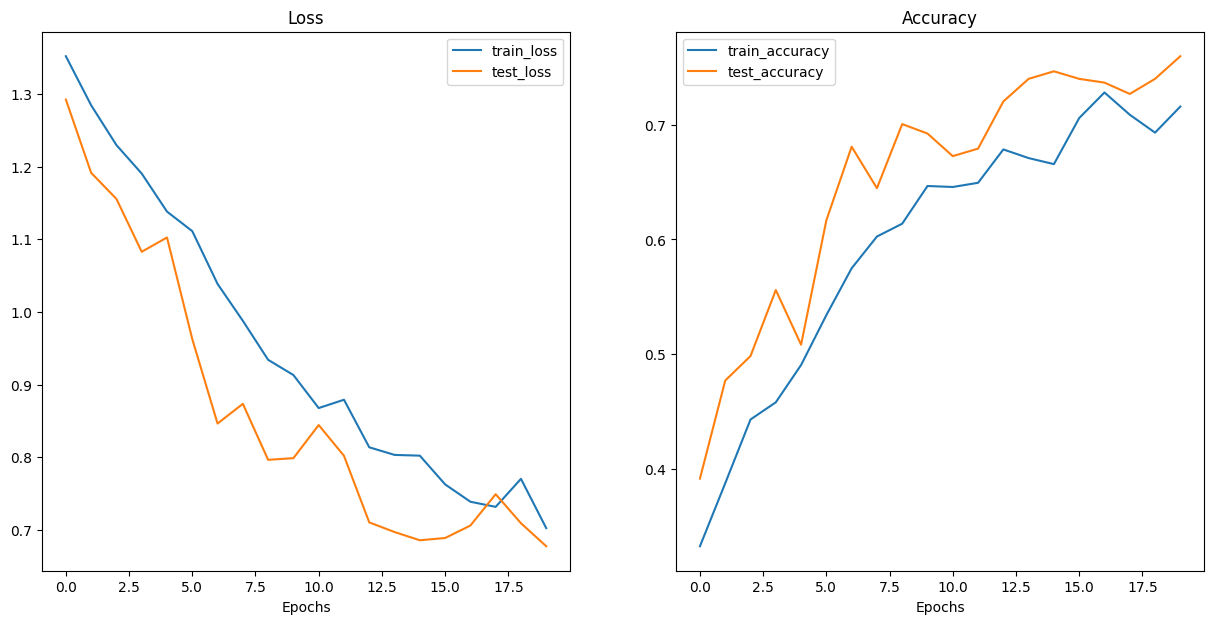

In [15]:
from helper_functions import plot_loss_curves
plot_loss_curves(results)

In [16]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents= True, exist_ok=True)
model_name = "modelv0.pth"
model_save_path = model_path / model_name
print(f"Saving model to {model_save_path}")
torch.save(obj=model_0.state_dict(), f= model_save_path)

Saving model to models/modelv0.pth
